Imports

In [1]:
import os
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

Path setups

In [2]:
path_to_dataset = "/Users/sakshisharma/Desktop/Mexico"
path_preimages = "/Users/sakshisharma/Desktop/Mexico/Image/Pre-disaster"
path_postimages = "/Users/sakshisharma/Desktop/Mexico/Image/Post-disaster"
path_labels = "/Users/sakshisharma/Desktop/Mexico/Label"
path_mbi_features = "/Users/sakshisharma/Desktop/Mexico/Feature/MBI"

In [3]:
print("Path to desktop:", path_to_dataset)
print("Pre-disaster images path:", path_preimages)
print("Post-disaster images path:", path_postimages)
print("Labels path:", path_labels)
print("MBI feature path:", path_mbi_features)

Path to desktop: /Users/sakshisharma/Desktop/Mexico
Pre-disaster images path: /Users/sakshisharma/Desktop/Mexico/Image/Pre-disaster
Post-disaster images path: /Users/sakshisharma/Desktop/Mexico/Image/Post-disaster
Labels path: /Users/sakshisharma/Desktop/Mexico/Label
MBI feature path: /Users/sakshisharma/Desktop/Mexico/Feature/MBI


In [4]:
print("Pre-disaster folder exists:", os.path.exists(path_preimages))
print("Post-disaster folder exists:", os.path.exists(path_postimages))
print("Label folder exists:", os.path.exists(path_labels))
print("MBI folder exists:", os.path.exists(path_mbi_features))

Pre-disaster folder exists: True
Post-disaster folder exists: True
Label folder exists: True
MBI folder exists: True


Count and overview of the files from the dataset

In [5]:
tif_files = [file for file in os.listdir(path_preimages) if file.endswith('.tif')]
pre_tif_files = [file for file in os.listdir(path_preimages) if file.endswith('.tif')]
post_tif_files = [file for file in os.listdir(path_postimages) if file.endswith('.tif')]
label_tif_files = [f for f in os.listdir(path_labels) if f.endswith('.tif')]
mbi_tif_files = [f for f in os.listdir(path_mbi_features) if f.endswith('.tif')]
print("Total Pre-disaster TIFF files:", len(pre_tif_files))
print("Total Post-disaster TIFF files:", len(post_tif_files))
print("Total Label TIFF files:", len(label_tif_files))
print("Total MBI TIFF files:", len(mbi_tif_files))
print("Total TIFF files (Pre + Post):", len(pre_tif_files) + len(post_tif_files))


Total Pre-disaster TIFF files: 724
Total Post-disaster TIFF files: 724
Total Label TIFF files: 724
Total MBI TIFF files: 724
Total TIFF files (Pre + Post): 1448


Bar plot for dataset overview

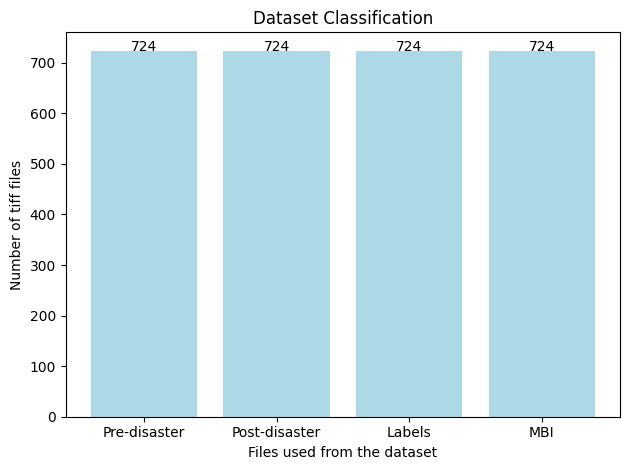

In [ ]:
import matplotlib.pyplot as plt

dataset_classification = ['Pre-disaster', 'Post-disaster', 'Labels', 'MBI']
quantity = [len(pre_tif_files), len(post_tif_files), len(label_tif_files), len(mbi_tif_files)]

bars = plt.bar(dataset_classification, quantity, color=['lightblue'] * 4)

plt.title('Dataset Classification')
plt.xlabel('Files used from the dataset')
plt.ylabel('Number of tiff files')

index = 0
while index < len(bars):
    bar = bars[index]
    height_of_bar = bar.get_height()
    bar_left_xaxis = bar.get_x()
    center_bar = bar.get_width() / 2
    text_center = bar_left_xaxis + center_bar 
    text_yaxis = height_of_bar
    text = str(int(height_of_bar))
    
    plt.text(text_center, text_yaxis, text, ha='center') 

    index = index + 1

plt.tight_layout()
plt.show()


Fixing the Image Dtype issue -> the images in the dataset are of type np.int8 (signed 8-bit integer) -> meaning the pixel values of these images range from -128 to 127 but causes a problem becasue the standard image prcessing tools are suppose to be unsigned values ranging from 0 to 255.

In [7]:
def fix_image_dtype(image_change):
    if image_change.dtype == np.int8:
        return (image_change.astype(np.int16) + 128).astype(np.uint8)
    return image_change

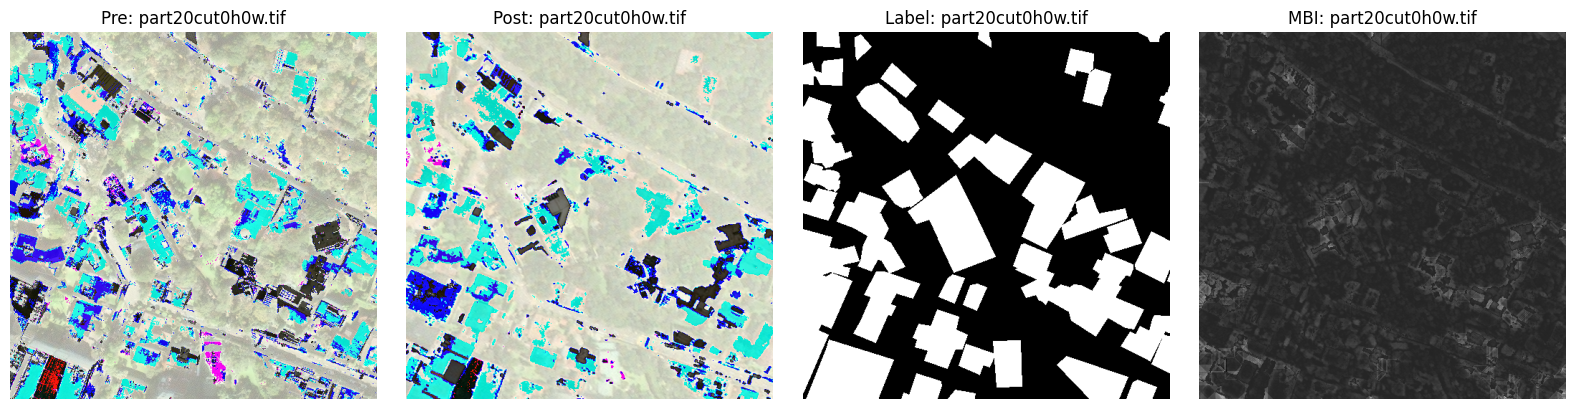

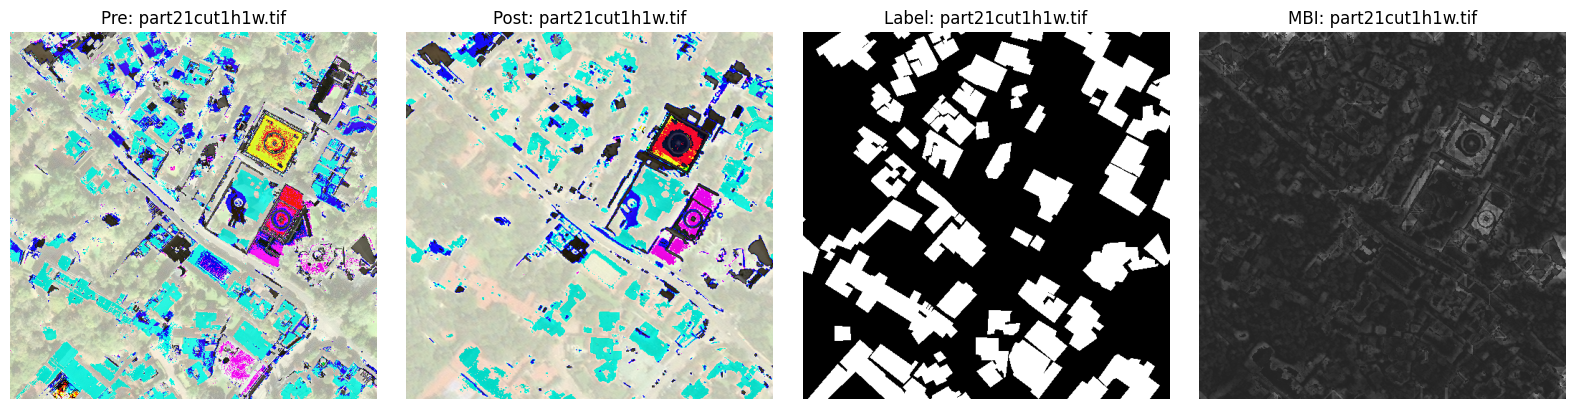

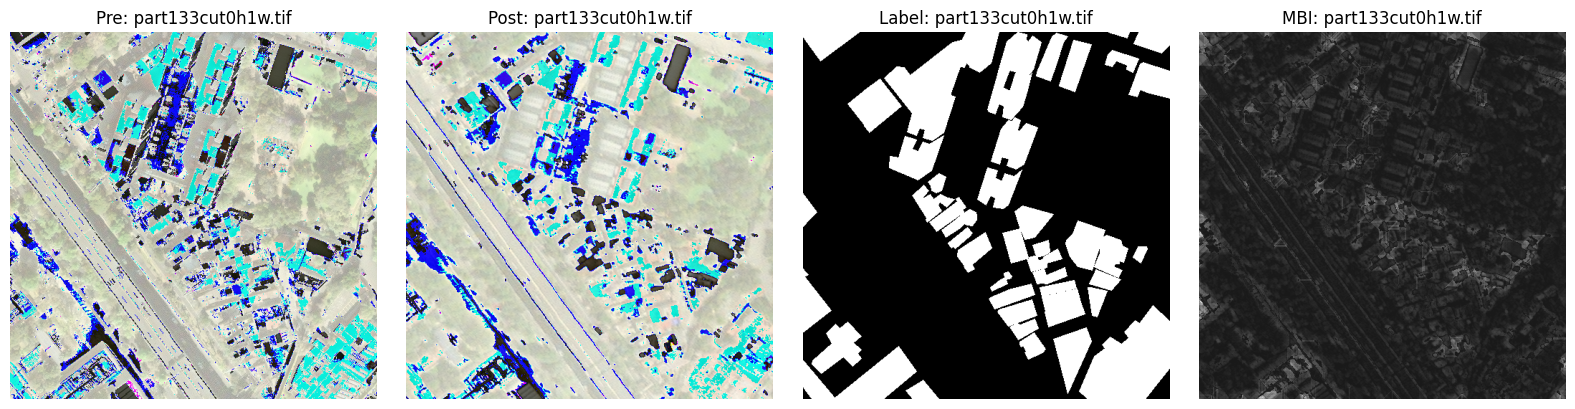

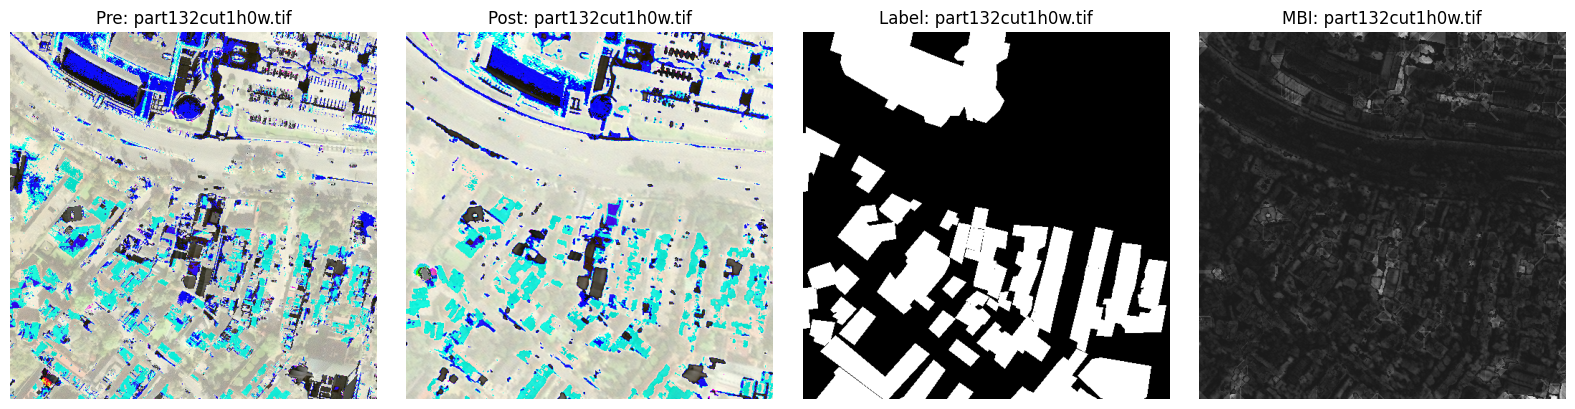

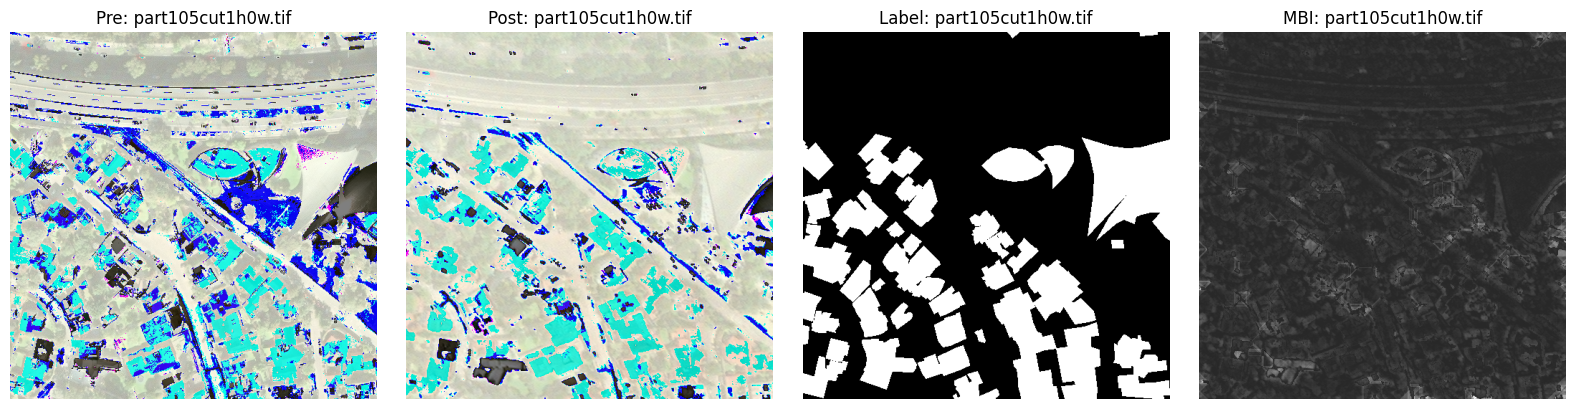

In [8]:
no_files = min(5, len(pre_tif_files), len(post_tif_files), len(label_tif_files), len(mbi_tif_files))

for i in range(no_files):
    pre_image = fix_image_dtype(tiff.imread(os.path.join(path_preimages, pre_tif_files[i])))
    post_image = fix_image_dtype(tiff.imread(os.path.join(path_postimages, post_tif_files[i])))
    label_image = fix_image_dtype(tiff.imread(os.path.join(path_labels, label_tif_files[i])))
    mbi_image = fix_image_dtype(tiff.imread(os.path.join(path_mbi_features, mbi_tif_files[i])))

    plt.figure(figsize=(16, 4))

    plt.subplot(1, 4, 1)
    plt.imshow(pre_image)
    plt.title(f"Pre: {pre_tif_files[i]}")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(post_image)
    plt.title(f"Post: {post_tif_files[i]}")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(label_image, cmap='gray')
    plt.title(f"Label: {label_tif_files[i]}")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(mbi_image, cmap='gray')
    plt.title(f"MBI: {mbi_tif_files[i]}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    
    



Understanding the labels that is damage as given in the dataset

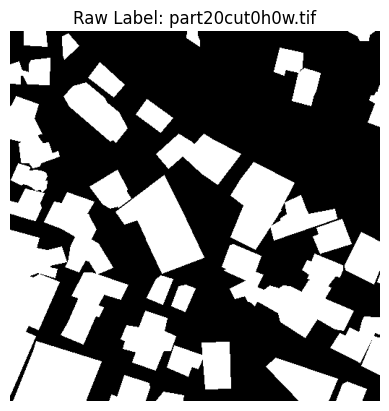

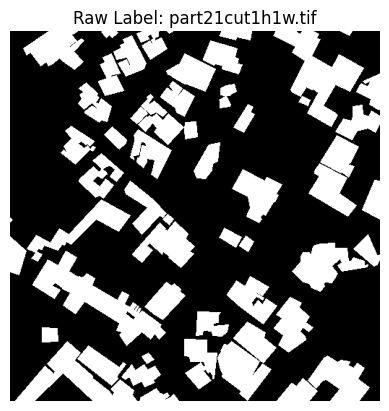

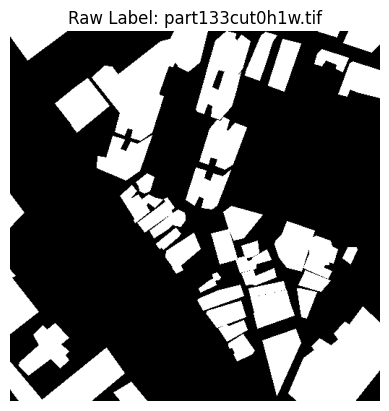

In [ ]:
import matplotlib.pyplot as plt
import tifffile as tiff
import os

for i in range(3):  # show first 3
    file = label_tif_files[i]
    filepath = os.path.join(path_labels, file)
    label_img = tiff.imread(filepath)

    plt.imshow(label_img, cmap='gray')  # grayscale visualization
    plt.title(f"Raw Label: {file}")
    plt.axis('off')
    plt.show()


Unique label values found:
Intact (Label 0): 160694 pixels
Severe (Label 1): 100390 pixels
Collapse (Label 2): 1060 pixels


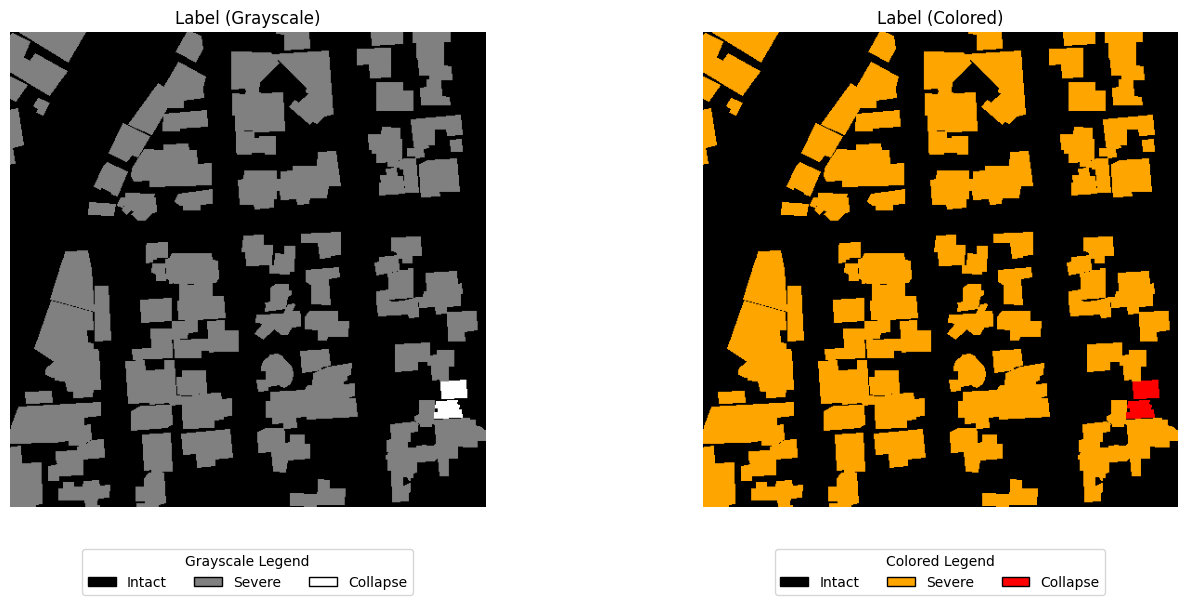

In [52]:
import os
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

name_label_file = "part76cut1h1w.tif"
label_image = tiff.imread(os.path.join(path_labels, name_label_file))


damage_label_names = {0: "Intact", 1: "Severe", 2: "Collapse"}
damage_label_colors = {0: [0, 0, 0], 1: [255, 165, 0], 2: [255, 0, 0]}
damage_gray_colors = {0: [0, 0, 0], 1: [128, 128, 128], 2: [255, 255, 255]}

unique_val = np.unique(label_image)
print("Unique label values found:")
for val in unique_val:
    name = damage_label_names.get(val, 'Unknown')
    count = np.sum(label_image == val)
    print(f"{name} (Label {val}): {count} pixels")


def apply_colormap(label_img, cmap_dict):
    rgb =  np.zeros((*label_img.shape, 3), dtype=np.uint8)
    for val, color in cmap_dict.items(): 
        rgb[label_img == val] = color 
    return rgb


colored_image = apply_colormap(label_image, damage_label_colors)


def create_legend_patches(colormap):
    patches = []
    for val, color in colormap.items():
        patches.append(
            mpatches.Patch(facecolor=np.array(color)/255, edgecolor='black', label=damage_label_names.get(val, 'Unknown'))
        )
    return patches

plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.imshow(label_image, cmap='gray')
plt.title("Label (Grayscale)")
plt.axis('off')
plt.legend(handles=create_legend_patches(damage_gray_colors), loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, title = "Grayscale Legend")


plt.subplot(1, 2, 2)
plt.imshow(colored_image)
plt.title("Label (Colored)")
plt.axis('off')
plt.legend(handles=create_legend_patches(damage_label_colors), loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, title = "Colored Legend")


plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
plt.show()


In [39]:
import os
import numpy as np
import tifffile as tiff

label_files = os.listdir(path_labels)

for file_name in label_files:
    if not file_name.endswith(('.tif', '.tiff')):
        continue  # skip non-tiff files

    label_path = os.path.join(path_labels, file_name)
    try:
        label_image = tiff.imread(label_path)
    except Exception as e:
        print(f"Skipping {file_name}: {e}")
        continue

    unique_values = np.unique(label_image)
    if set([0, 1, 2]).issubset(unique_values):
        print(f"Found image with 3 labels: {file_name}")
        print(f"Unique values: {unique_values}")
        break


Found image with 3 labels: part162cut1h1w.tif
Unique values: [0 1 2]
